In [1]:
""" 
Analysis of copy strategy 12.8
Also foramlizing within-day analysis code,
especially for testing xcopying.
Especially focused on lines (oriented). correlation between lines>?

"""

' \nAnalysis of copy strategy 12.8\nAlso foramlizing within-day analysis code,\nespecially for testing xcopying.\nEspecially focused on lines (oriented). correlation between lines>?\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

%cd ..

/data1/code/python/drawmonkey


In [470]:
1.15-pi

-1.9915926535897932

In [282]:
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

In [464]:
animal = "Red
date = 200804
expt = "pilot"
session = 1

from tools.preprocess import *
fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

found one matching filename: ['/data2/animals/Red/200804/200804_152148_pilot_Red_1.h5']
found one matching filename: ['/data2/animals/Red/200804/200804_152148_pilot_Red_1.pkl']
-- loaded presaved data: /data2/animals/Red/200804/200804_152148_pilot_Red_1.pkl


In [463]:
def getTrialsParams(filedata, trial):
    """ get params for this trial"""
    return filedata["TrialRecord"]["User"]["Params"][f"{trial}"]


t = 200
print(getTrialsParams(fd, t)["task"]["MinDistancePeanutToInk"])
print(getTrialsParams(fd, t)["task"]["PnutSampCollisExt"])
print(getTrialsParams(fd, t)["task"]["rewardmax_success"])

[[4.5]]
[[13.]]
[[2200.]]


# (1) Does score incresae over bloques, for bloques, where fade is complete?
I think that fade of 0.03 or less is probably complete, based on behavior.

In [465]:

############ START HERE
import seaborn as sns

# === get dataframe, including block categories
df = extractSessionDf(fd)
yplot = "hausdorff"
# yplot = "behscore"


got 549 total trials
I think this means there is only one blaock...


Text(0.5, 1.0, 'zoomed in')

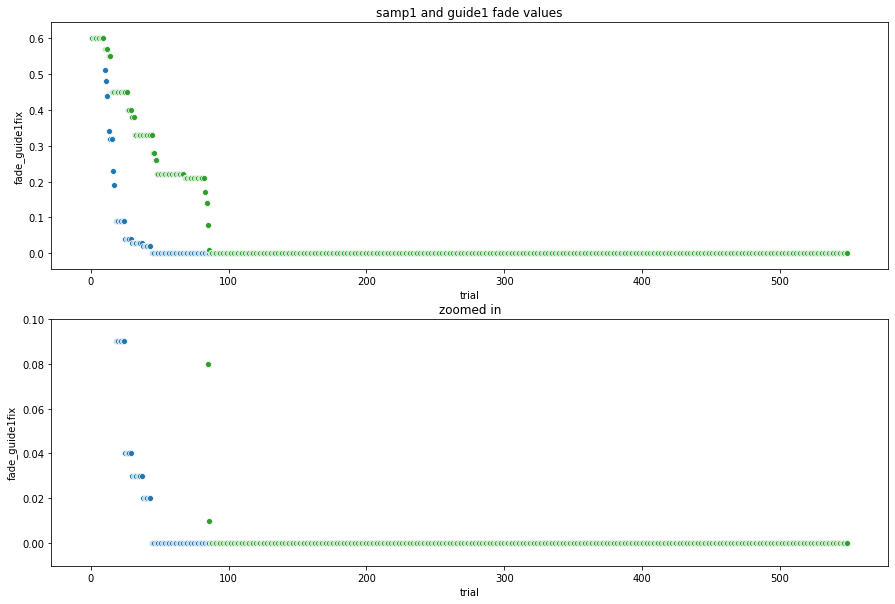

In [466]:
# === plot timeline across all trials, just summarizing things related to copying (fade, etc).
dfthis = df
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.scatterplot(x = "trial", y="fade_samp1", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1task", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1fix", data=dfthis)
plt.title("samp1 and guide1 fade values")

plt.subplot(2,1,2)
sns.scatterplot(x = "trial", y="fade_samp1", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1task", data=dfthis)
sns.scatterplot(x = "trial", y="fade_guide1fix", data=dfthis)
plt.ylim([-0.01, 0.1])
plt.title("zoomed in")

In [ ]:

if animal=="Red":
    ALPHA_INVISIBLE = 0.05 # below this, invisible.
elif animal=="Pancho":
    ALPHA_INVISIBLE = 0.03
else:
    assert False
dfthis = df[(df["fade_samp1"]<ALPHA_INVISIBLE) & (df["fade_guide1task"]<ALPHA_INVISIBLE) & (df["fade_guide1fix"]<ALPHA_INVISIBLE)]

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(x = "bloque", y="hausdorff", data=dfthis)
plt.subplot(2,1,2)
sns.lineplot(x = "bloque", y="hausdorff", data=dfthis, err_style="bars")


## (2) Should see correlation between fade and hausdorff [sanity check]
Indeed looks like big dropoff around fade <0.03, as I suspected based on my notes.
Does look like potnetially increasing dropoff after 0.03, suggesting that still using some information from samp.

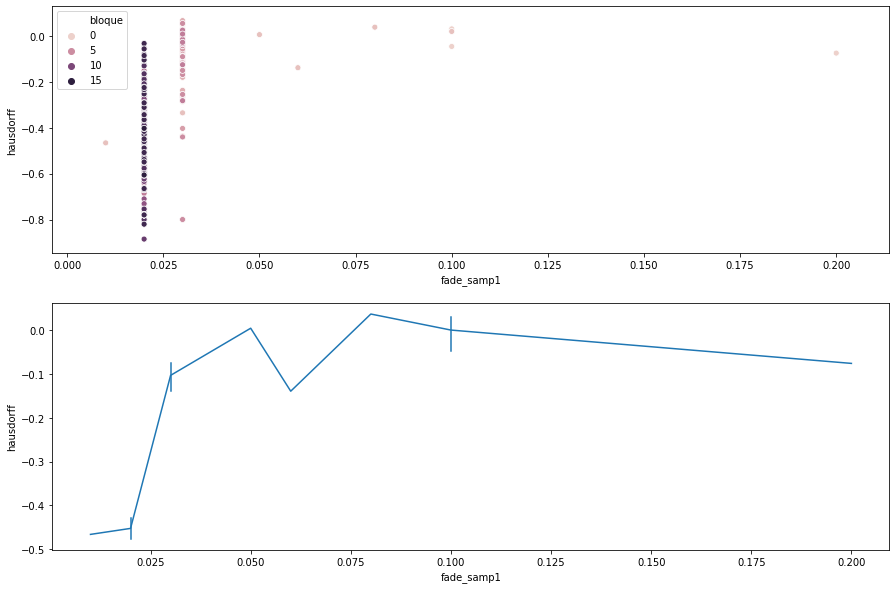

In [386]:

ALPHA_MAX = 0.2
dfthis = df[(df["fade_samp1"]<ALPHA_MAX) & (df["fade_guide1task"]<ALPHA_MAX) & (df["fade_guide1fix"]<ALPHA_MAX)]

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(x = "fade_samp1", y="hausdorff", data=dfthis, hue="bloque")
plt.subplot(2,1,2)
sns.lineplot(x = "fade_samp1", y="hausdorff", data=dfthis, err_style="bars")


## BELOW: visualizing drawings. Did not do

In [467]:
ALPHA_INVISIBLE = 0.021

## === WHICH TRIALS?
if True:
    # Filter by fade values
    dfthis = df[(df["fade_samp1"]<ALPHA_INVISIBLE) & (df["fade_guide1task"]<ALPHA_INVISIBLE) & (df["fade_guide1fix"]<ALPHA_INVISIBLE)]
    trials_list_all = list(dfthis["trial"].values)

else:
    # 1) Load into stroke dict
    # -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
    # --- for a given set of trials, collect trajectories for all of them
    targ = {
        "blockcategory":[12],
    #     "task_stage":["line"],
    }

    trials_list_all = getIndsTrials(fd, targ, keep_only_if_go=True, keep_only_if_clean_strokes=True)

print("extracted trials list:")
print(trials_list_all)

extracted trials list:
[86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 

In [257]:
## === only keep trials that success fixation
T = getIndsTrials(fd, keep_only_if_go=True)

trials_list_all = [t for t in trials_list_all if t in T]


got 191 total trials


In [258]:
## get only unique triasl

trials_list_all = removeRedundantTrials(fd, trials_list_all)
print(trials_list_all)

THIS NOT OPTIMAL - see notes. is ok if same tasks always occur in direct succession chron order.
started with 116 trials
ended with 76 trials
[87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 100, 101, 102, 145, 146, 148, 152, 153, 155, 157, 159, 161, 163, 164, 166, 192, 195, 196, 197, 200, 203, 204, 205, 207, 210, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222, 224, 358, 359, 360, 362, 365, 366, 373, 385, 386, 389, 390, 393, 411, 412, 415, 416, 417, 427, 430, 431, 438, 439, 441, 444, 451, 453, 489, 511, 548]


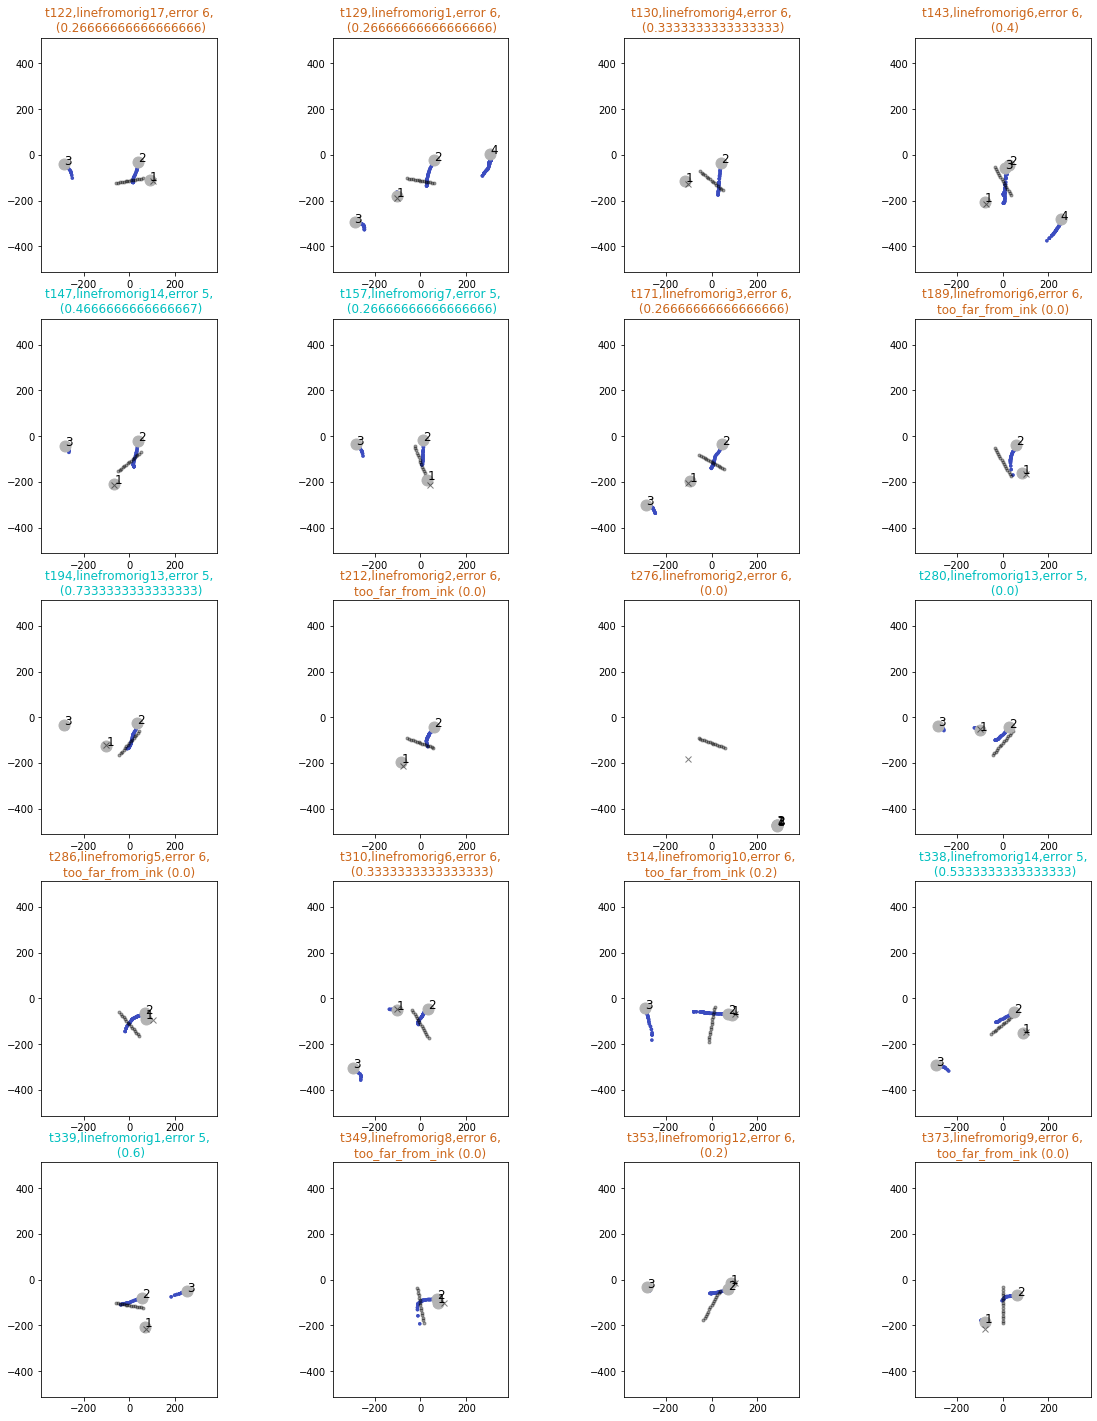

In [226]:
####  VISUALIZE, OVERLAID ON SAME PLOT

##################### 1) Plot raw, each trial
%matplotlib inline
rand_subset = 20
plotMultTrialsSimple(fd, trials_list_all, zoom=False, rand_subset= rand_subset)

In [ ]:
# %matplotlib notebook

##################### 2) Overlay all
filedata= fd
faketimesteps_ver = "from_orig"
ALIGN_BY = "ownmidpt"
ROTATE_BY = "task_first_stroke"
SCALE_BY = "task_first_stroke"
subsample_trials = None

if subsample_trials is not None:
    trials_list = random.sample(trials_list_all, subsample_trials)
    print(trials_list)
else:
    trials_list = trials_list_all


# 1) Preprocess data
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task",
                                   ver=faketimesteps_ver, replace_key_to_do=True)
stroke_dict = processAngles(stroke_dict)

# fig, axes = plt.subplots(3,2, figsize=(3*5, 2*5))
# fig.subplots_adjust(hspace=0.08, wspace=-0.35)

# # == 1) Plot in original space, trials + first touch point
# ax = axes[0][0]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], ax=ax)

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title="", strokes_to_plot="first", 
#                      plotver="raw", ax=ax)

# # == 1) Plot in original space, trials + first touch point
# ax = axes[0][1]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], ax=ax)

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title="", strokes_to_plot="first_touch", 
#                      plotver="onecolor", ax=ax)

if len(trials_list)<10:
    alpha_task = 0.4
    alpha_beh = 0.3
else:
    alpha_task = 0.05
    alpha_beh = 0.1

# # == 2) Plot touch, aligned to origin 
# ax = axes[1][0]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
#                           rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
# plt.plot(0,0, 'kx')

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title=f"align by {faketimesteps_ver}", strokes_to_plot="first_touch", 
#                      plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
#                      rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
# plt.plot(0,0, 'kx')

# == 2) Plot strokes, aligned to origin 
# ax = axes[1][1]
# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
#                       title="", strokes_to_plot="first", 
#                      plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
#                           rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
# plt.plot(0,0, 'kx')

# plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
#                       title=f"align by {faketimesteps_ver}", strokes_to_plot="first", 
#                      plotver="raw", align_by=ALIGN_BY, scale_by=SCALE_BY,
#                      rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
# plt.plot(0,0, 'kx')

# == 2) Plot strokes, aligned to own midpoint
plt.figure()
ax = plt.subplot(111)
plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all_task", 
                      title="", strokes_to_plot="first", 
                     plotver=[0.8, 0.8, 0.8], align_by=ALIGN_BY, scale_by=SCALE_BY,
                          rotate_by=ROTATE_BY, alpha_force=alpha_task, ax=ax)
plotDictCanvasOverlay(stroke_dict, filedata, "strokes_all", 
                      title=f"align by {faketimesteps_ver}", strokes_to_plot="all", 
                     plotver="onecolor", align_by=ALIGN_BY, scale_by=SCALE_BY,
                     rotate_by=ROTATE_BY, alpha_force=alpha_beh, ax=ax)
plt.plot(0,0, 'xk')

### CORRELATION BETWEEN ANGLE OF SAMP AND BEHAVIOR


In [468]:
# === 1) collect angles for all trials.
from pythonlib.tools.stroketools import stroke2angle
from tools.utils import getTrialsStrokesByPeanuts
from math import pi

FORCE_TO_0_PI = True
# AGGREG_METHOD = "mean" # how to deal if there are multiple strokes in beh?
# FIRST_TWO_PTS = False
AGGREG_METHOD = "firststroke" # how to deal if there are multiple strokes in beh?
FIRST_TWO_PTS = False

Abeh = []
Atask = []
for t in trials_list_all:
    
    
    # == collect angles of first stroke for groudn truth task
    strokes_task = getTrialsTaskAsStrokes(fd, t)
    angles_task = stroke2angle(strokes_task, force_use_two_points=FIRST_TWO_PTS)
    Atask.append(angles_task[0])

    
    # == skip if fixation error
    outcome = getTrialsOutcomesWrapper(fd, t)
    if outcome["trial_end_method"]=="fixation_error":
        Abeh.append(np.nan)
        continue

    
    # == collect angles for behavior
    strokes = getTrialsStrokesByPeanuts(fd, t)    
    if len(strokes)==0:
        # then likely becuase no peanuts (e..g, online abort)
#         print(outcome["trial_end_method"])
#         print(t)
#         assert outcome["trial_end_method"]=="online_abort"
        # use clean strokes instead
        strokes = getTrialsStrokesClean(fd, t)
        if len(strokes)==0:
            print(f"skiped this trial {t}, since no data. was not fixation error. MAKE SURE NOT TOO MANY Of THESE")
    if strokes:
        angles = stroke2angle(strokes, force_use_two_points=FIRST_TWO_PTS)
        if AGGREG_METHOD=="firststroke":
            A = angles[0]
#             print(f"num sterokes not 1, was {len(angles)}, but took first angle.")
        elif AGGREG_METHOD=="mean":
            A = np.mean(angles)
#             print(f"num sterokes not 1, was {len(angles)}, but took mean (non-circuluar!).")
        Abeh.append(A)
    else:
        # then no behavior. append nan
        Abeh.append(np.nan)
        
if FORCE_TO_0_PI:
    Abeh = [a if a>=0 and a<=pi else a-pi for a in Abeh]
    Atask = [a if a>=0 and a<=pi else a-pi for a in Atask]
        
trials = np.array(trials_list_all)
Abeh = np.array(Abeh)
Atask = np.array(Atask)

trial 88 - angle(beh) [2.88254692] - angle(task) [0.91629786]
trial 101 - angle(beh) [2.77324373] - angle(task) [2.0943951]
trial 157 - angle(beh) [3.0731284] - angle(task) [2.87979327]
trial 207 - angle(beh) [2.33503363] - angle(task) [1.04719755]
trial 215 - angle(beh) [2.95912136] - angle(task) [2.61799388]
trial 393 - angle(beh) [2.94141159] - angle(task) [2.0943951]
trial 411 - angle(beh) [2.54132908] - angle(task) [0.]
trial 548 - angle(beh) [2.44464809] - angle(task) [0.]


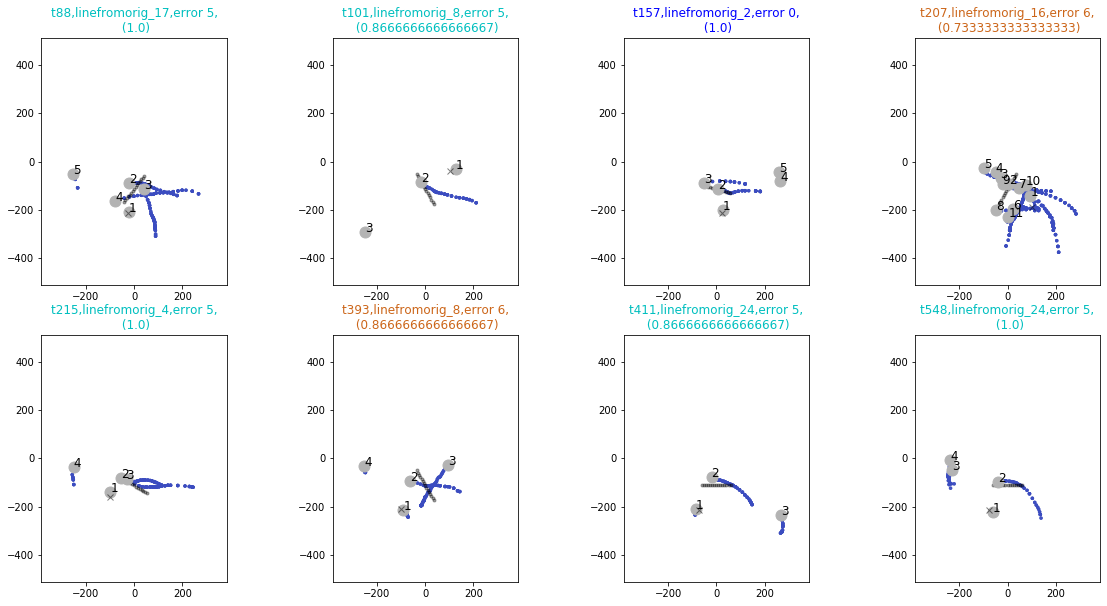

In [265]:
## SANITY CHECK (plot a few trials and print extracted angles.
%matplotlib inline
n=8

trialstoplot = random.sample(list(trials), n)
trialstoplot.sort()
plotMultTrialsSimple(fd, trialstoplot)

for t in trialstoplot:
    print(f"trial {t} - angle(beh) {Abeh[trials==t]} - angle(task) {Atask[trials==t]}")
        

Text(0.5, 1.0, 'using pruned trials')

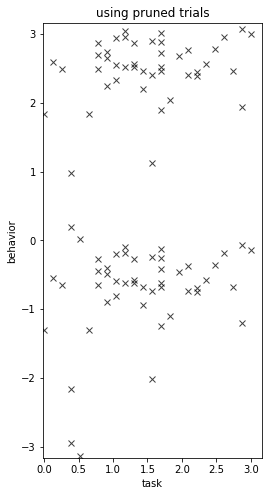

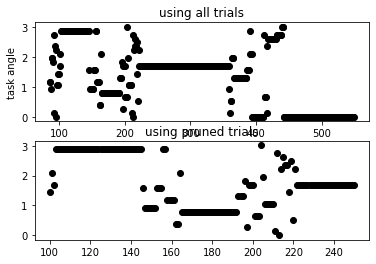

In [469]:
%matplotlib inline

# ==== 2) Plot angles for task vs. behavior
trial_range = None
trial_range = [0, 192] # only plot trials within this range (inclusize)
# trial_range = [193, 500] # only plot trials within this range (inclusize)
# trial_range = [0, 245] # only plot trials within this range (inclusize)
# trial_range = [245, 500] # only plot trials within this range (inclusize)
trial_range = [0, 443] # only plot trials within this range (inclusize)
# trial_range = [0, 181] # only plot trials within this range (inclusize)
trial_range = [100, 250] # only plot trials within this range (inclusize)

if trial_range is not None:
    T = trials[(trials >= trial_range[0]) & (trials <= trial_range[1])]
    At = Atask[(trials >= trial_range[0]) & (trials <= trial_range[1])]
    Ab = Abeh[(trials >= trial_range[0]) & (trials <= trial_range[1])]
else:
    T = trials
    At = Atask
    Ab = Abeh

plt.figure(figsize = (8,8))
plt.title("using pruned trials")
plt.plot(At, Ab, 'xk', alpha=0.75)
plt.plot(At, Ab-pi, 'xk', alpha=0.75)
plt.xlabel("task")
plt.ylabel("behavior")
plt.axis("square")
plt.xlim([-0.02, pi+0.02])
plt.ylim([-0.02, pi+0.02])
plt.ylim([-pi-0.02, pi+0.02])

# == timecourse
plt.figure()

plt.subplot(211)
plt.plot(trials_list_all, Atask, "ok")
plt.title("using all trials")
plt.ylabel("task angle")

plt.subplot(212)
plt.plot(T, At, "ok")
plt.title("using pruned trials")

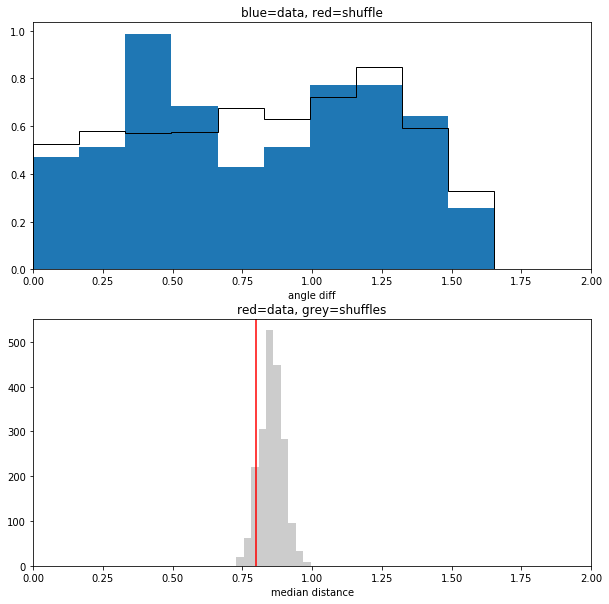

In [455]:
# == distribution of differneces
from pythonlib.tools.vectools import angle_diff
def _get_angle_diffs(anglesbeh, anglestask):
    """ angles1 and 2 and lists of angles (rads)
    returns Diffs, list of differences, taking minimum trying
    the angles1 in both directions"""
    
    Diffs = []
    for a1, a2 in zip(anglesbeh, anglestask):
        if ~np.isnan(a1):
            d=min([angle_diff(a1, a2), angle_diff(a1-pi, a2)]) # since task is (0,pi) but behavior could be either direction)
            Diffs.append(d)
    return Diffs

plt.figure(figsize=(10,10))
# fig, axes = plt.subplots(2,1, sharex=True)
# data
Diffs_data = _get_angle_diffs(Ab, At)
plt.subplot(211)
plt.xlim([0, 2])
plt.hist(Diffs_data, bins=np.linspace(0,pi, 20), density=True)
# shuffle
plt.title("blue=data, red=shuffle")
plt.xlabel("angle diff")
Ab_shuff = np.copy(Ab)
D = []
for _ in range(10):
    np.random.shuffle(Ab_shuff)
    Diffs_shuff = _get_angle_diffs(Ab_shuff, At)
    D.extend(Diffs_shuff)
plt.hist(D, bins=np.linspace(0,pi, 20), histtype="step", color="k", density=True)

# overlay medians and distribution for shuffles
Diff_medians = []
Nshuff = 2000
for _ in range(Nshuff):
    np.random.shuffle(Ab_shuff)
    Diffs_shuff = _get_angle_diffs(Ab_shuff, At)
    Diff_medians.append(np.median(Diffs_shuff))
plt.subplot(212)
plt.xlim([0, 2])
plt.xlabel("median distance")
plt.title("red=data, grey=shuffles")
plt.hist(Diff_medians, color=[0.8, 0.8, 0.8])
# plt.plot([np.median(Diffs_data), np.median(Diffs_data)], [0, 1], color="r")
plt.axvline(np.median(Diffs_data), color="r")

Text(0, 0.5, 'task angle (k=task; r=beh')

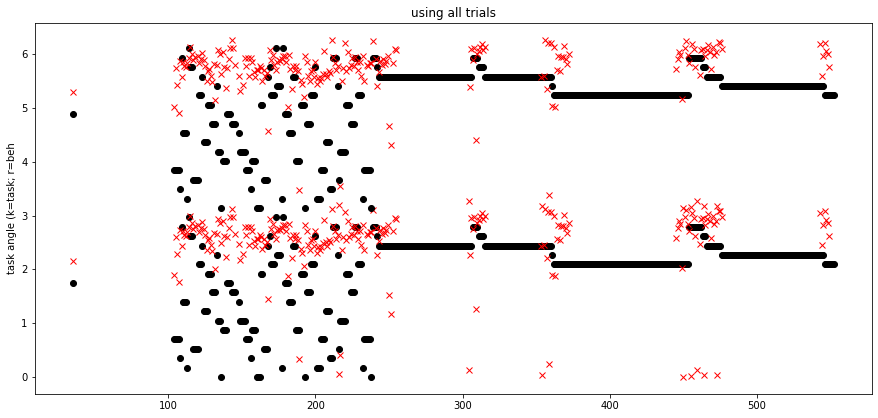

In [453]:
# == overlay timecourse for beh and task
# == timecourse
%matplotlib inline

plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(trials_list_all, Atask, "ok")
plt.plot(trials_list_all, Abeh, "xr")
plt.plot(trials_list_all, Atask+pi, "ok")
plt.plot(trials_list_all, Abeh+pi, "xr")
plt.title("using all trials")
plt.ylabel("task angle (k=task; r=beh")

# plt.subplot(212)
# plt.plot(T, At, "ok")
# plt.title("using pruned trials")


In [ ]:
trials=100

In [ ]:
## VARIOUS SCRATCH STUFF

# Plot trials that dont have data (are nan)
trialsthis = list(trials[~np.isnan(Abeh)])
%matplotlib inline
rand_subset = 20
plotMultTrialsSimple(fd, trialsthis, zoom=False, rand_subset= rand_subset)

# for each trial extracted, print its outcome
for t in trialsthis:
    O = getTrialsOutcomesWrapper(fd, t)
    print(f"{t} - {O['trial_end_method']} - {O['online_abort']['failure_mode']}")

# count and print and plot aborts
def count_num_aborts(triallist):
    num_aborts = sum([getTrialsOutcomesWrapper(fd, t)["trial_end_method"]=="online_abort" for t in triallist])
    num_total = len(triallist)
    print("num aborted trials (could include peanuts)")
    print(num_aborts)
    print("num total trials")
    print(num_total)
    
    plt.figure()
    y = [getTrialsOutcomesWrapper(fd, t)["trial_end_method"]=="online_abort" for t in triallist]
    plt.plot(triallist, y, '-ok')